# Cyclone Analyzer 

Starting by importing some important libraby for plotting and easy manipulation

In [1]:
import cv2 as cv
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import math as mth

The images given for tests are imported and are saved as a set of Red, Green, Blue (RGB) two dimensional numpy arrays for easy manipulation and analysis. The images displayed below were given as test case inputs titled as 1.jpg, 2.jpg, 3.jpg

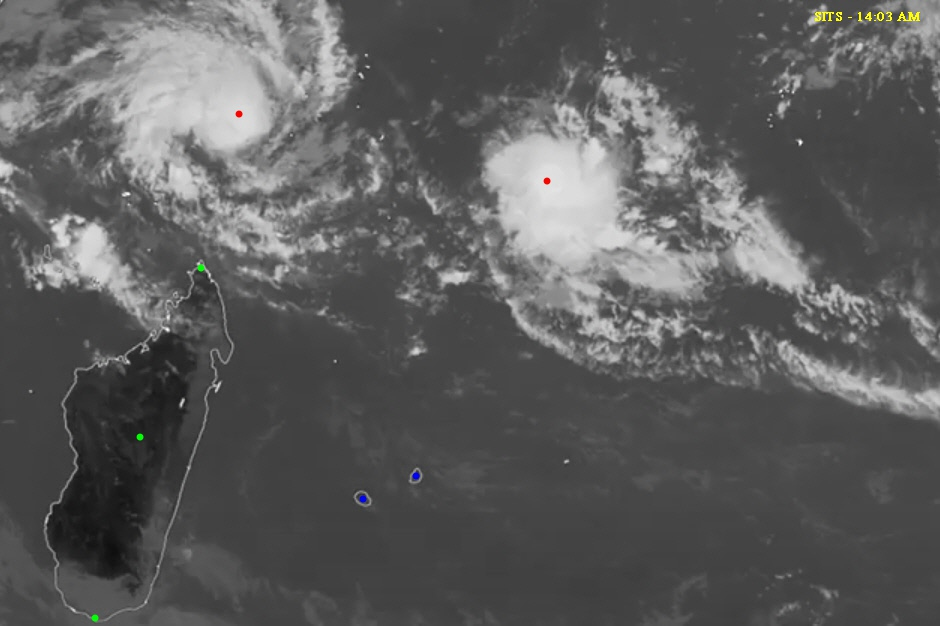

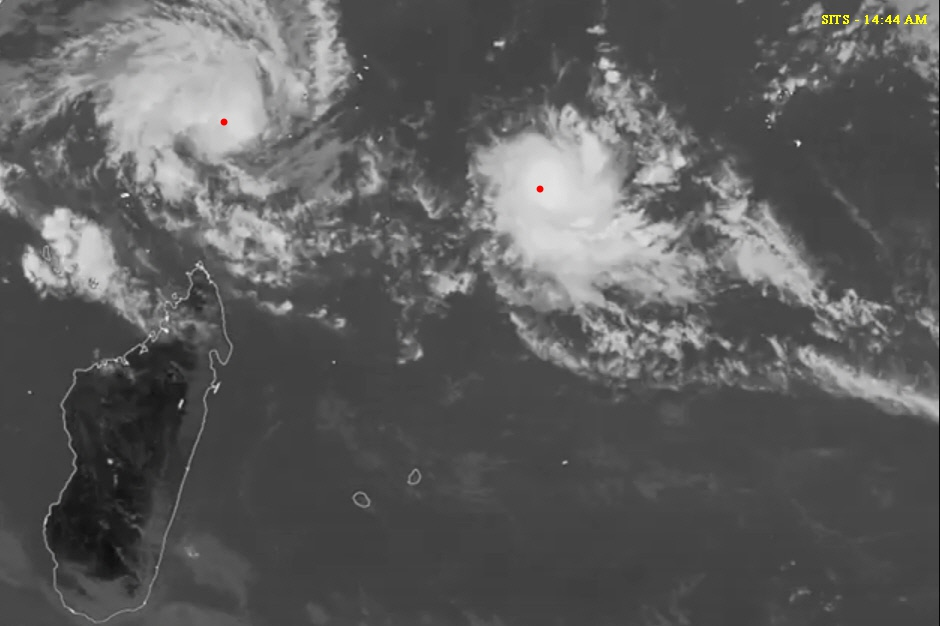

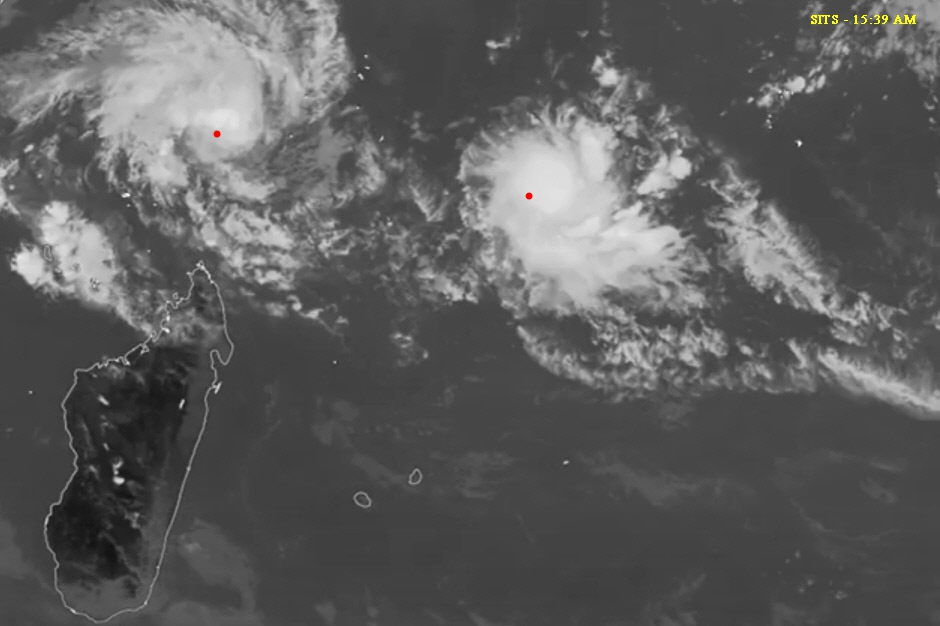

Text(0.5, 1.0, '3.jpg')

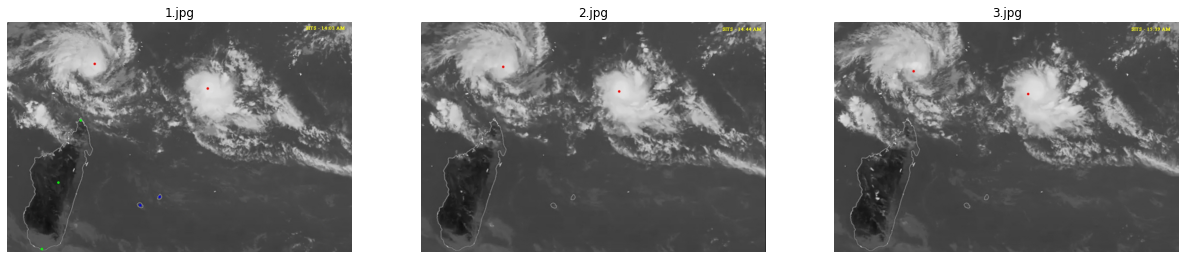

In [2]:
img1 = cv.imread("1.jpg")
img2 = cv.imread("2.jpg")
img3 = cv.imread("3.jpg")
img_1og = img1[:, :, [2, 1, 0]]    #convert images in RGB format
img_2og = img2[:, :, [2, 1, 0]]    #convert images in RGB format
img_3og = img3[:, :, [2, 1, 0]]    #convert images in RGB format

plt.figure(figsize=(21,21))

plt.subplot(1, 3, 1)
plt.imshow(img_1og)
plt.axis("off")
plt.title("1.jpg")

plt.subplot(1, 3, 2)
plt.imshow(img_2og)
plt.axis("off")
plt.title("2.jpg")

plt.subplot(1, 3, 3)
plt.imshow(img_3og)
plt.axis("off")
plt.title("3.jpg")

The above declared arrays are converted to Hue Saturation Value Images (HSv Images) so that colours can be easily identified and manipulated.

In [3]:
img1_hsv = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
img2_hsv = cv.cvtColor(img2, cv.COLOR_BGR2HSV)
img3_hsv = cv.cvtColor(img3, cv.COLOR_BGR2HSV)

Defining colour boundaries for identification of red, blue and green coloir dots

In [4]:
#defining blue color using opencv color map 
blue_lower = np.array([100,180,20])
blue_upper = np.array([140,255,255])

#defining red color using opencv color map
red_lower = np.array([0, 100, 20])
red_upper = np.array([10, 255, 255])

#defining green color using opencv color map
green_lower = np.array([40,150,20])
green_upper = np.array([70,255,255])

Masking the images to seperate out the dots from the rest of images for easy manipulation

In [5]:
blue_img1 = cv.inRange(img1_hsv, blue_lower, blue_upper)
green_img1 = cv.inRange(img1_hsv, green_lower, green_upper)
red_img1 = cv.inRange(img1_hsv, red_lower, red_upper)
red_img2 = cv.inRange(img2_hsv, red_lower, red_upper)
red_img3 = cv.inRange(img3_hsv, red_lower, red_upper)
red_img = red_img1+red_img2+red_img3
#for confirmation and aligning all the red dots together

Displaying the masked images to chech for any errors

Text(0.5, 1.0, 'red dots')

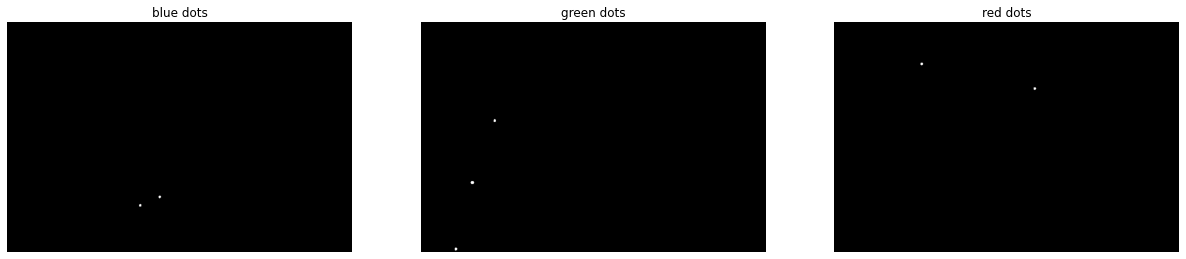

In [6]:
#Code just to print the masked image 

plt.figure(figsize=(21,21))

plt.subplot(1, 3, 1)
plt.imshow(blue_img1,cmap="gray")
plt.axis("off")
plt.title("blue dots")

plt.subplot(1, 3, 2)
plt.imshow(green_img1,cmap="gray")
plt.axis("off")
plt.title("green dots")

plt.subplot(1, 3, 3)
plt.imshow(red_img1,cmap="gray")
plt.axis("off")
plt.title("red dots")

Identifying the pixel cordinates of the various colour dots and saving it in array to be used later.
In the code written below:
<br>bpa : 1st coordinate element of blue pixel
<br>bpb : 2nd coordinate element of blue pixel
<br>gpa : 1st coordinate element of green pixel
<br>gpb : 2nd coordinate element of green pixel
<br>rpXa : 1st coordinate element of red pixel in X.jpg
<br>rpXb : 2md coordinate element of red pixel in X.jpg

In [7]:
dimension = img1.shape
bpa,bpb,gpa,gpb,rp1a,rp1b,rp2a,rp2b,rp3a,rp3b = [],[],[],[],[],[],[],[],[],[]   #declaring dynamic arrays
for i in range(dimension[0]) :
    for j in range(dimension[1]) :
        if(blue_img1[i][j]>0):
            bpa.append(i)
            bpb.append(j)
        if(green_img1[i][j]>0):
            gpa.append(i)
            gpb.append(j)
        if(red_img1[i][j]>0):
            rp1a.append(i)
            rp1b.append(j)
        if(red_img2[i][j]>0):
            rp2a.append(i)
            rp2b.append(j)
        if(red_img3[i][j]>0):
            rp3a.append(i)
            rp3b.append(j)

Finding out the coordinates of the pixels by taking average of cordinates of various pixels
<br>The scale is the average of scale1 and scale2 that is the scale used for analysis of the image

In [8]:
def cordi(arr1, arr2):
    a,b = 0,0
    l1 = len(arr1)
    l2 = len(arr2)
    for i in range(l1):
        a = a + arr1[i]
    for i in range(l2):
        b = b + arr2[i]
    a = a/len(arr2)
    b = b/len(arr2)
    return [a,b]

lb1 = cordi(bpa[0:len(bpa)//2],bpb[0:len(bpa)//2])
lb2 = cordi(bpa[len(bpa)//2+1:],bpb[len(bpa)//2+1:])

lg1 = cordi(gpa[0:len(gpa)//3],gpb[0:len(gpa)//3])
lg2 = cordi(gpa[len(gpa)//3+1:2*len(gpa)//3],gpb[len(gpa)//3+1:2*len(gpa)//3])
lg3 = cordi(gpa[2*len(gpa)//3+1:],gpb[2*len(gpa)//3+1:])

lr1_1 = cordi(rp1a[0:len(rp1a)//2],rp1b[0:len(rp1b)//2])
lr1_2 = cordi(rp1a[len(rp1a)//2+1:],rp1b[len(rp1b)//2+1:])

lr2_1 = cordi(rp2a[0:len(rp2a)//2],rp2b[0:len(rp2b)//2])
lr2_2 = cordi(rp2a[len(rp2a)//2+1:],rp2b[len(rp2b)//2+1:])

lr3_1 = cordi(rp3a[0:len(rp3a)//2],rp3b[0:len(rp3b)//2])
lr3_2 = cordi(rp3a[len(rp3a)//2+1:],rp3b[len(rp3b)//2+1:])

pixel_distance1 = abs(lg1[0]-lg3[0])
pixel_distance2 = abs(lb1[1]-lb2[1])
#scale factor to be used later answer final be in kilometer
scale1 = 1500/pixel_distance1
scale2 = 250/pixel_distance2
scale = (scale1+scale2)/2
print("the calculated scale 1 = "+str(scale1))
print("the calculated scale 2 = "+str(scale2))
print("Average scale = "+str(scale))

the calculated scale 1 = 4.909340839169994
the calculated scale 2 = 4.700203252032518
Average scale = 4.804772045601256


In [9]:
print("The final cordinates of the points are as follows : ")
print("Cordinates of Reunion island : "+str(lb1))
print("Cordinates of Mauritius island : "+str(lb2))
print("Cordinates of Antsiranana : "+str(lg1))
print("Cordinates of capital city Antananarivo  : "+str(lg2))
print("Cordinates of Benonoka : "+str(lg3))
print("...................................................")
print("Cordinates of cyclone Belna in 1.jpg : "+str(lr1_1))
print("Cordinates of cyclone Ambali in 1.jpg : "+str(lr1_2))
print("...................................................")
print("Cordinates of cyclone Belna in 2.jpg : "+str(lr2_1))
print("Cordinates of cyclone Ambali in 2.jpg : "+str(lr2_2))
print("...................................................")
print("Cordinates of cyclone Belna in 3.jpg : "+str(lr3_1))
print("Cordinates of cyclone Ambali in 3.jpg : "+str(lr3_2))

The final cordinates of the points are as follows : 
Cordinates of Reunion island : [475.43243243243245, 415.7567567567568]
Cordinates of Mauritius island : [498.56756756756755, 362.56756756756755]
Cordinates of Antsiranana : [297.66, 189.32]
Cordinates of capital city Antananarivo  : [436.7755102040816, 139.6122448979592]
Cordinates of Benonoka : [603.2, 98.36]
...................................................
Cordinates of cyclone Belna in 1.jpg : [113.51219512195122, 238.58536585365854]
Cordinates of cyclone Ambali in 1.jpg : [180.675, 546.675]
...................................................
Cordinates of cyclone Belna in 2.jpg : [121.76923076923077, 223.53846153846155]
Cordinates of cyclone Ambali in 2.jpg : [188.56410256410257, 539.5641025641025]
...................................................
Cordinates of cyclone Belna in 3.jpg : [133.45238095238096, 216.47619047619048]
Cordinates of cyclone Ambali in 3.jpg : [195.52380952380952, 528.5714285714286]


Finding the equation of the lines and mapping them for better visualisation and finding the point of intersection

y = -1.6543049792531122x + 491.570020746888
y = -0.6331222925691431x + 530.1741641674994


Text(0.5, 1.0, 'On map with red dots aligned')

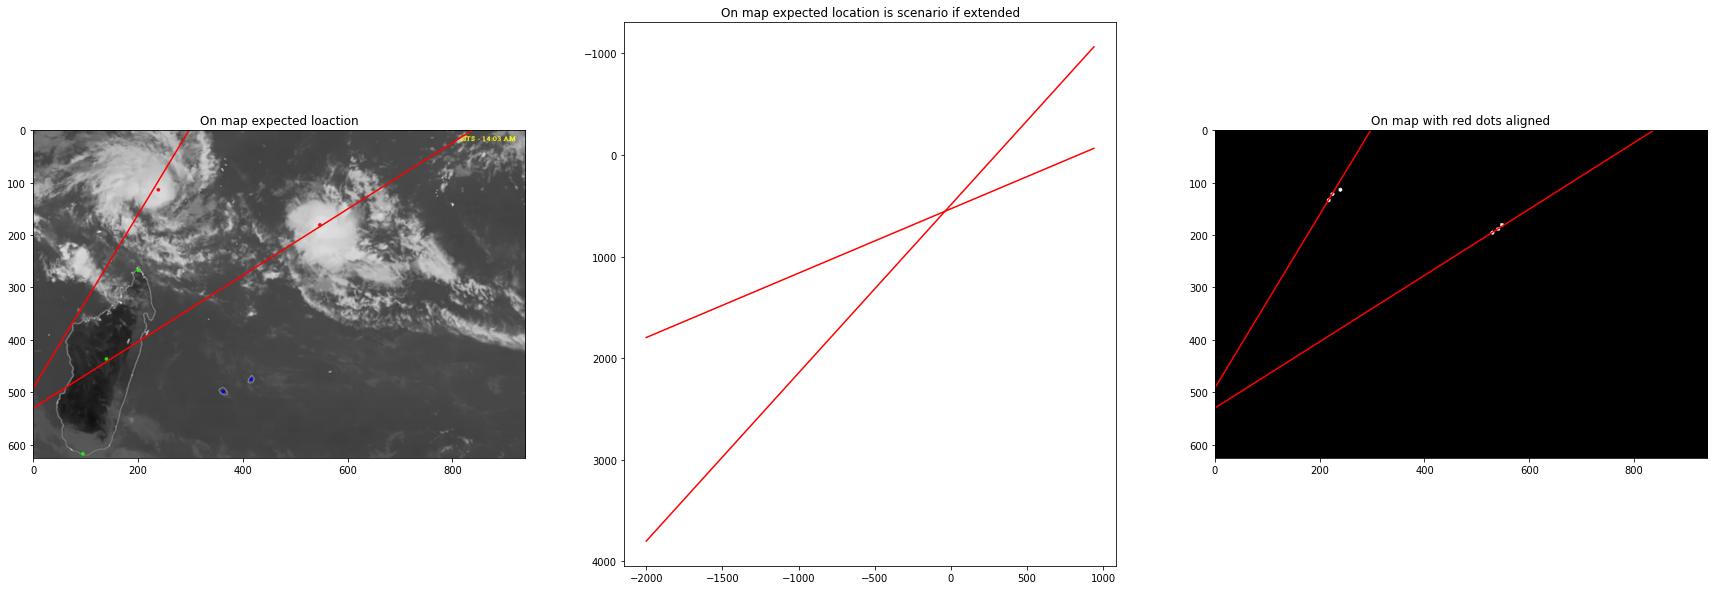

In [10]:
x1 = np.linspace(-2000,dimension[1],500)
m1 = (lr3_1[0]-lr2_1[0])/(lr3_1[1]-lr2_1[1])
c1 = lr2_1[0] - m1*lr2_1[1]
y1 = m1*x1 + c1 #-m1*x1 + y1 = c1
print("y = "+str(m1)+"x + "+str(c1))

x2 = np.linspace(-2000,dimension[1],500)
m2 = (lr3_2[0]-lr2_2[0])/(lr3_2[1]-lr2_2[1])
c2 = lr2_2[0] - m2*lr2_2[1]
y2 = m2*x2 + c2 #-m2*x2 + y2 = c2
print("y = "+str(m2)+"x + "+str(c2))

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.plot(x1, y1, '-r')
plt.plot(x2, y2, '-r')
plt.imshow(img_1og)
plt.title("On map expected loaction")

plt.subplot(1,3,2)
plt.plot(x1, y1, '-r')
plt.plot(x2, y2, '-r')
plt.gca().invert_yaxis()
plt.title("On map expected location is scenario if extended")

plt.subplot(1,3,3)
plt.plot(x1, y1, '-r')
plt.plot(x2, y2, '-r')
plt.imshow(red_img,cmap="gray")
plt.title("On map with red dots aligned")

In [11]:
#Solution of the equations comparing it with standard equations
X =(c2-c1)/(m1-m2)
Y = (c1*m2-c2*m1)/(m2-m1)
print("Co-ordinates of intersection are : ("+ str(Y) +","+ str(X)+")")

Co-ordinates of intersection are : (554.1083182653247,-37.80336655135478)


In [12]:
final_dis = mth.dist(([Y,X]),lg2)
final_dis = final_dis*scale
print("The two cyclones are expected to intersect " + str(final_dis)+ " km away from capital city")

The two cyclones are expected to intersect 1021.9975697757078 km away from capital city


In [13]:
t1 = 41 # time from 1 to 2 in minutes
t2 = 55 # time from 2 to 3 in minutes

dis1_1 = scale*mth.dist(lr1_1,lr2_1)
dis1_2 = scale*mth.dist(lr2_1,lr3_1)

dis2_1 = scale*mth.dist(lr1_2,lr2_2)
dis2_2 = scale*mth.dist(lr2_2,lr3_2)

u1 = dis1_2/t2
u2 = dis2_2/t2

col_dis1 = scale*mth.dist(lr3_1,([Y,X]))
col_dis2 = scale*mth.dist(lr3_2,([Y,X]))

print("The cyclones will collide "+str(col_dis1/u1)+" minutes after the last satellite image")
print("The cyclones reach "+str(abs(col_dis1/u1 - col_dis2/u2)) + " minutes apart")
if (abs(col_dis1/u1 - col_dis2/u2)) <=30:    #30 minutes considered as a range
    print("The cyclones will collide as they are reaching at point of collision approximately at the same time")
else:
    print("The cyclones will not collide")

The cyclones will collide 1980.2943717679407 minutes after the last satellite image
The cyclones reach 853.4668907340913 minutes apart
The cyclones will not collide
